# Machine Learning Model on Boombikes

Author : Dhruv Bafna
## Introduction
BoomBikes is a `US-based bike-sharing service` that allows individuals to rent bicycles on a short-term basis from computer-controlled docks. Due to the COVID-19 pandemic, the company has experienced a significant decline in revenue and is looking for strategies to recover once lockdowns are lifted.

To effectively plan for the post-pandemic period, `BoomBikes` aims to understand the `demand for shared bikes across the nation`. By analyzing factors affecting bike rentals, the company seeks to predict demand and optimize its services to stand out among competitors.

This project involves building a predictive model to estimate daily bike rentals (cnt) based on a variety of meteorological, temporal, and holiday-related factors. The insights derived from this model will help BoomBikes align its business strategy with actual demand trends.

## Business Goals / Objectives

1. `Predict Daily Bike Demand`:
Build a model to estimate the total number of bike rentals (cnt) each day.

2. `Identify Key Factors`:
Understand which variables significantly influence bike rental demand, including weather, season, holidays, and day type.

3. `Support Business Strategy`:
Use the model to help management make data-driven decisions for bike distribution, marketing campaigns, and service planning.

4. `Evaluate Model Performance`:
Assess the predictive accuracy of the model using metrics such as R-squared on the test set to ensure reliability.

## Algorithms

**Linear Regression**

## Data Overview
| Column| Description|
| ------------ | ----------------------------------------------------------------------------------------------------------------------------- |
| `instant`    | Record index|
| `dteday`     | Date|
| `season`     | Season of the year (1: Spring, 2: Summer, 3: Fall, 4: Winter)|
| `yr`| Year (0: 2018, 1: 2019)|
| `mnth`| Month (1 to 12)|
| `holiday`| Whether the day is a holiday (1 = Yes, 0 = No)|
| `weekday`    | Day of the week (0: Sunday, 1: Monday, …)|
| `workingday` | 1 if day is neither weekend nor holiday, 0 otherwise|
| `weathersit` | Weather situation: <br><br>1: Clear, Few clouds, Partly cloudy <br><br> 2: Mist + Cloudy <br><br> 3: Light Snow/Rain <br><br> 4: Heavy Rain/Snow |
| `temp`| Temperature in Celsius |
| `atemp` | Feels-like temperature in Celsius |
| `hum` | Humidity |
| `windspeed`  | Wind speed  |
| `casual`     | Number of casual users  |
| `registered` | Number of registered users|
| `cnt`        | Total bike rentals (target variable) |


In [ ]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Boombikes Dataset
df = pd.read_csv('/content/sample_data/day (4).csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
print("DataFrame Information")
print("Rows :",df.shape[0])
print("Columns :",df.shape[1])

DataFrame Information
Rows : 730
Columns : 16


In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# data Summary
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# checking null values in df
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df.isnull().sum() / len(df) * 100

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [ ]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

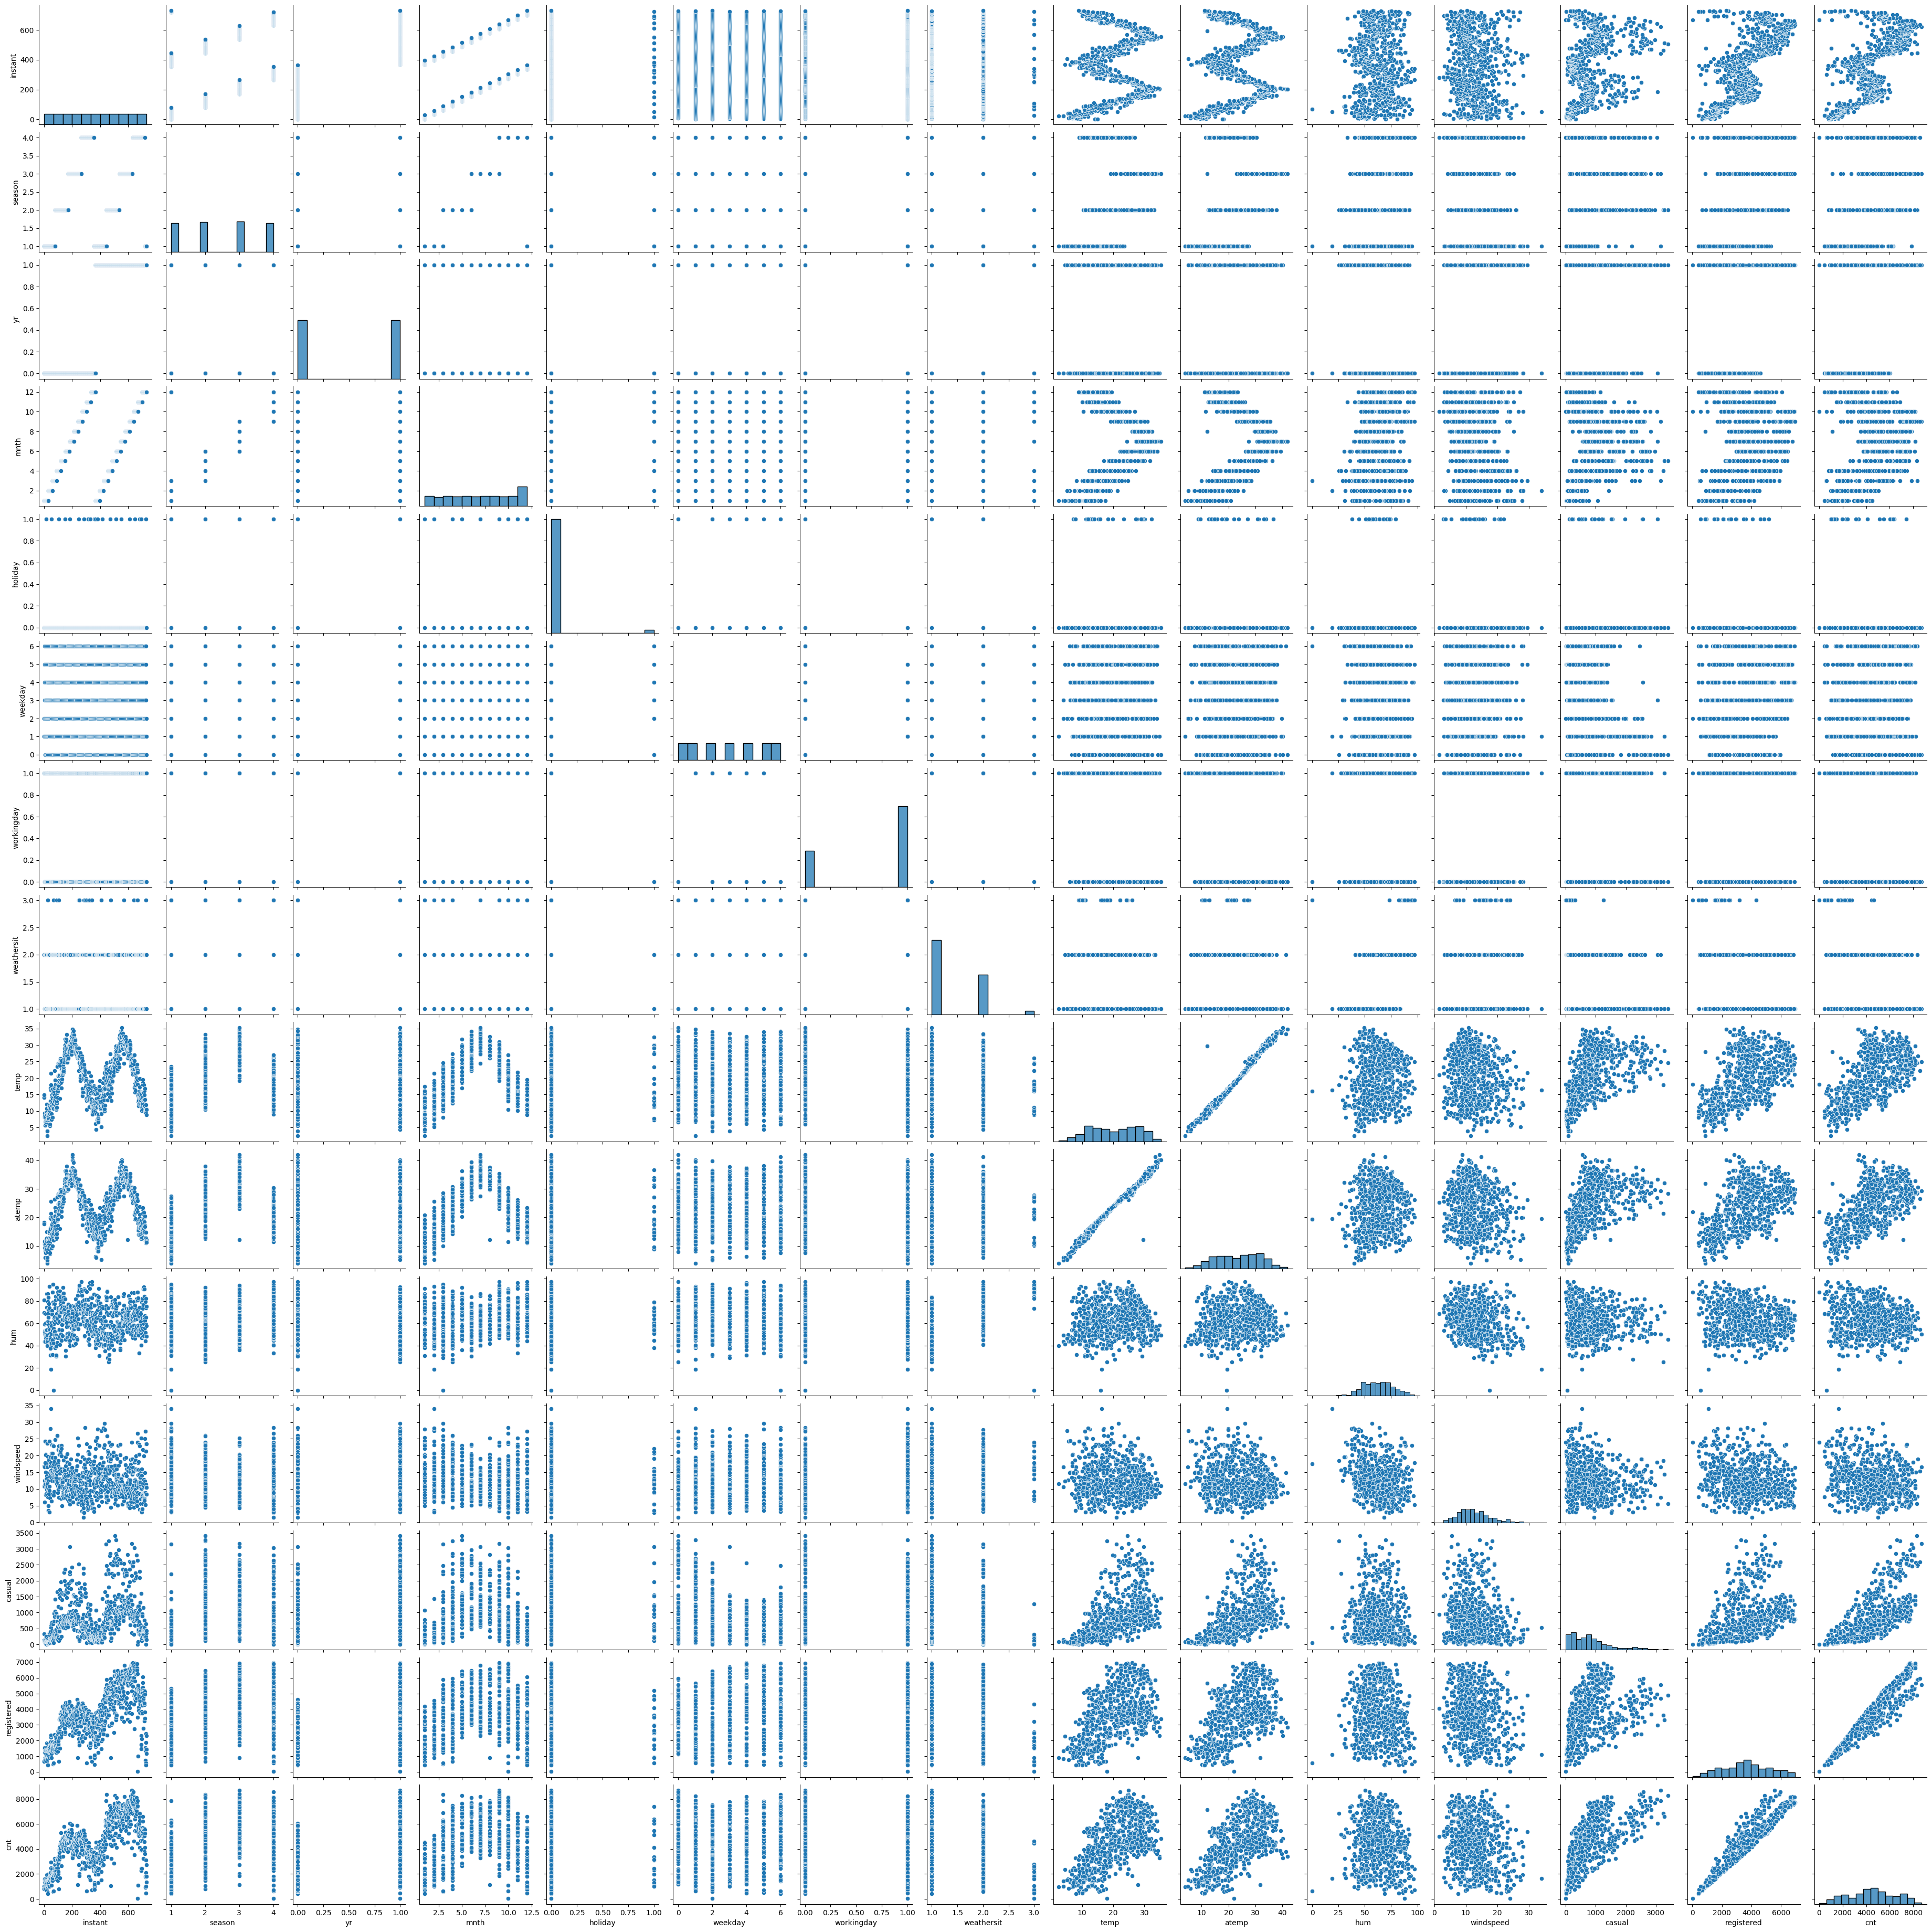

In [ ]:
sns.pairplot(df)

## Visualizing the relationship between categorical features and bike rental demand (`cnt`)
 Using boxplots to observe how the total bike rentals vary across:
- Different seasons (`season`)
- Months of the year (`mnth`)
- Holidays (`holiday`)
- Weekdays (`weekday`)
- Working days (`workingday`)
- Weather situations (`weathersit`)
## This helps in identifying patterns, trends, and potential outliers in the data.


<Axes: xlabel='weathersit', ylabel='cnt'>

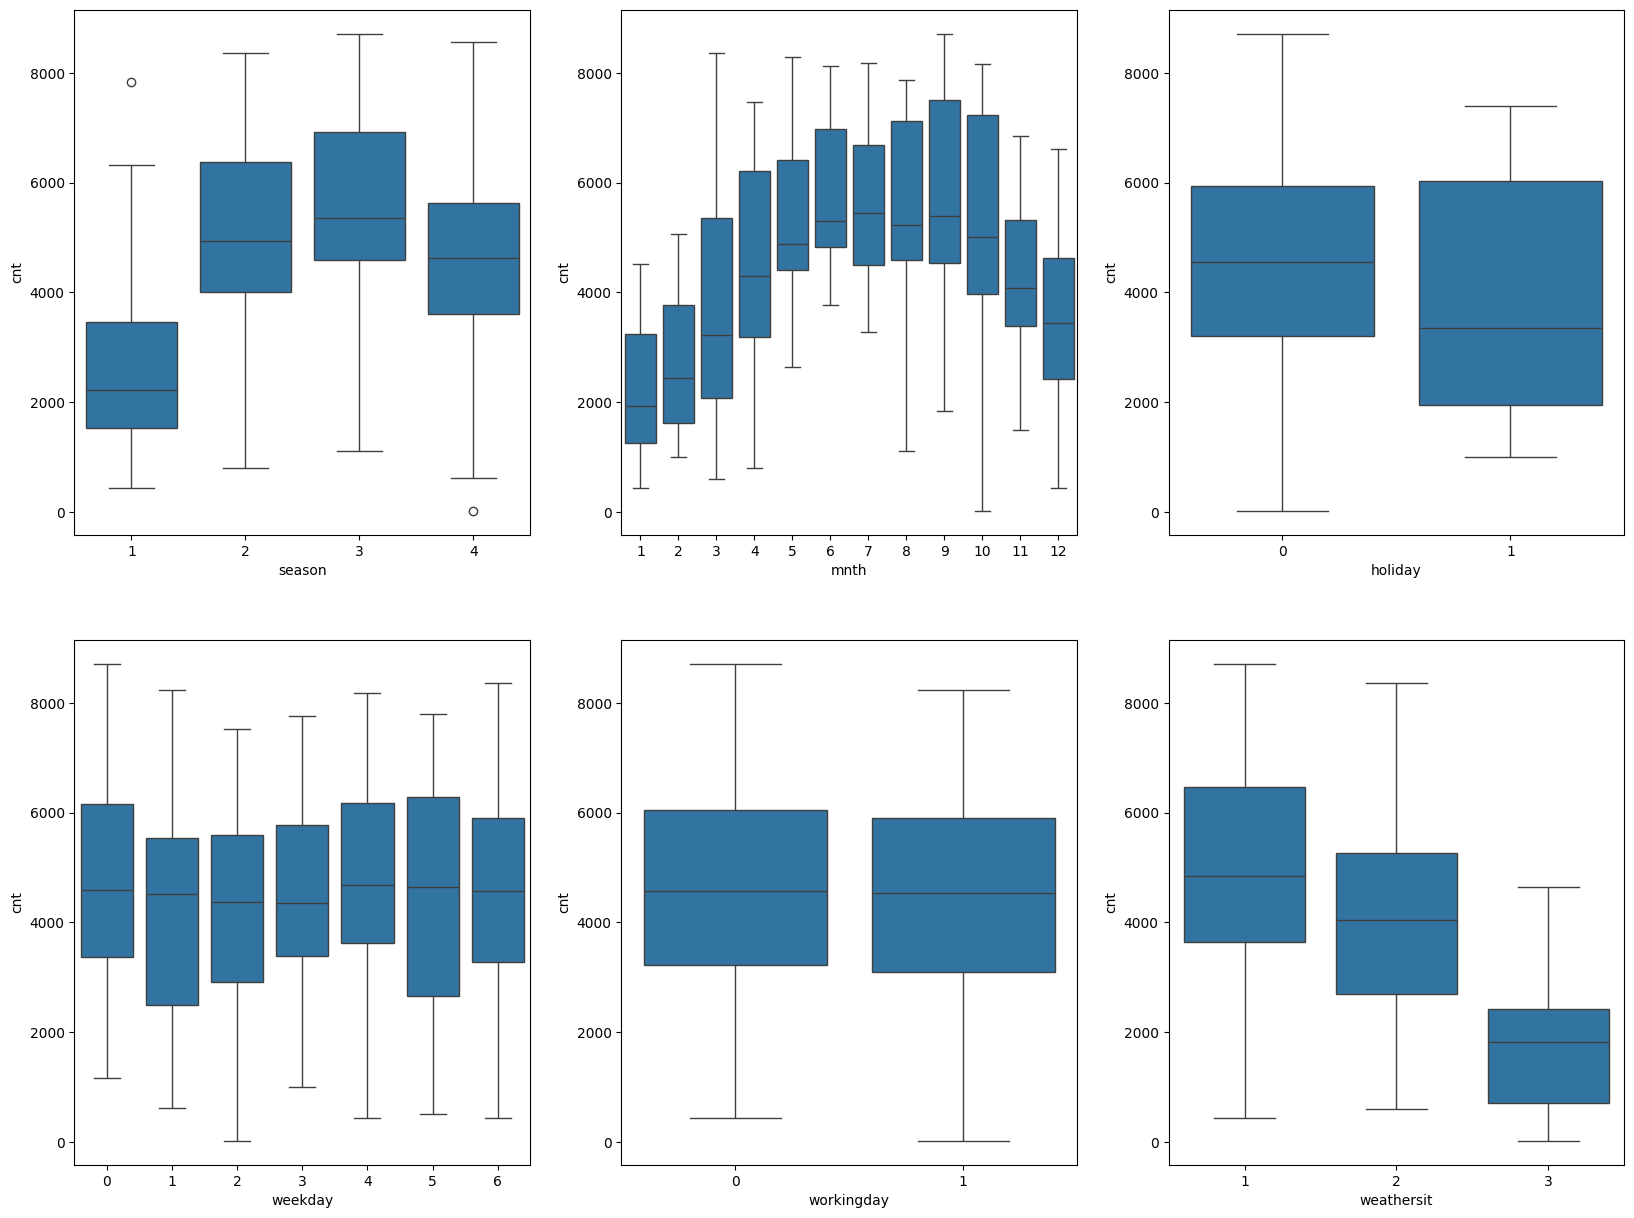

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)



In [ ]:
# import important libraries for scaling the columns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:

np.random.seed(0)
h_train , h_test = train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
scaling_nums = ['temp','atemp',	'hum',	'windspeed',	'casual',	'registered'	]

In [ ]:
scaler = MinMaxScaler()
h_train[scaling_nums] = scaler.fit_transform(h_train[scaling_nums])
h_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
247,248,05-09-2018,3,0,9,1,3,0,2,0.765327,0.717455,0.814513,0.475900,0.362089,0.302483,3351
335,336,02-12-2018,4,0,12,0,0,0,1,0.317788,0.331261,0.644911,0.195963,0.078052,0.527288,3940
702,703,04-12-2019,4,1,12,0,3,1,1,0.519232,0.511907,0.756118,0.379454,0.161092,0.871354,6606
440,441,17-03-2019,1,1,3,0,0,0,2,0.566998,0.559152,0.778874,0.220845,0.925176,0.672971,7836
136,137,17-05-2018,2,0,5,0,4,1,2,0.626185,0.603102,0.863461,0.637592,0.198357,0.494513,4123


<Axes: >

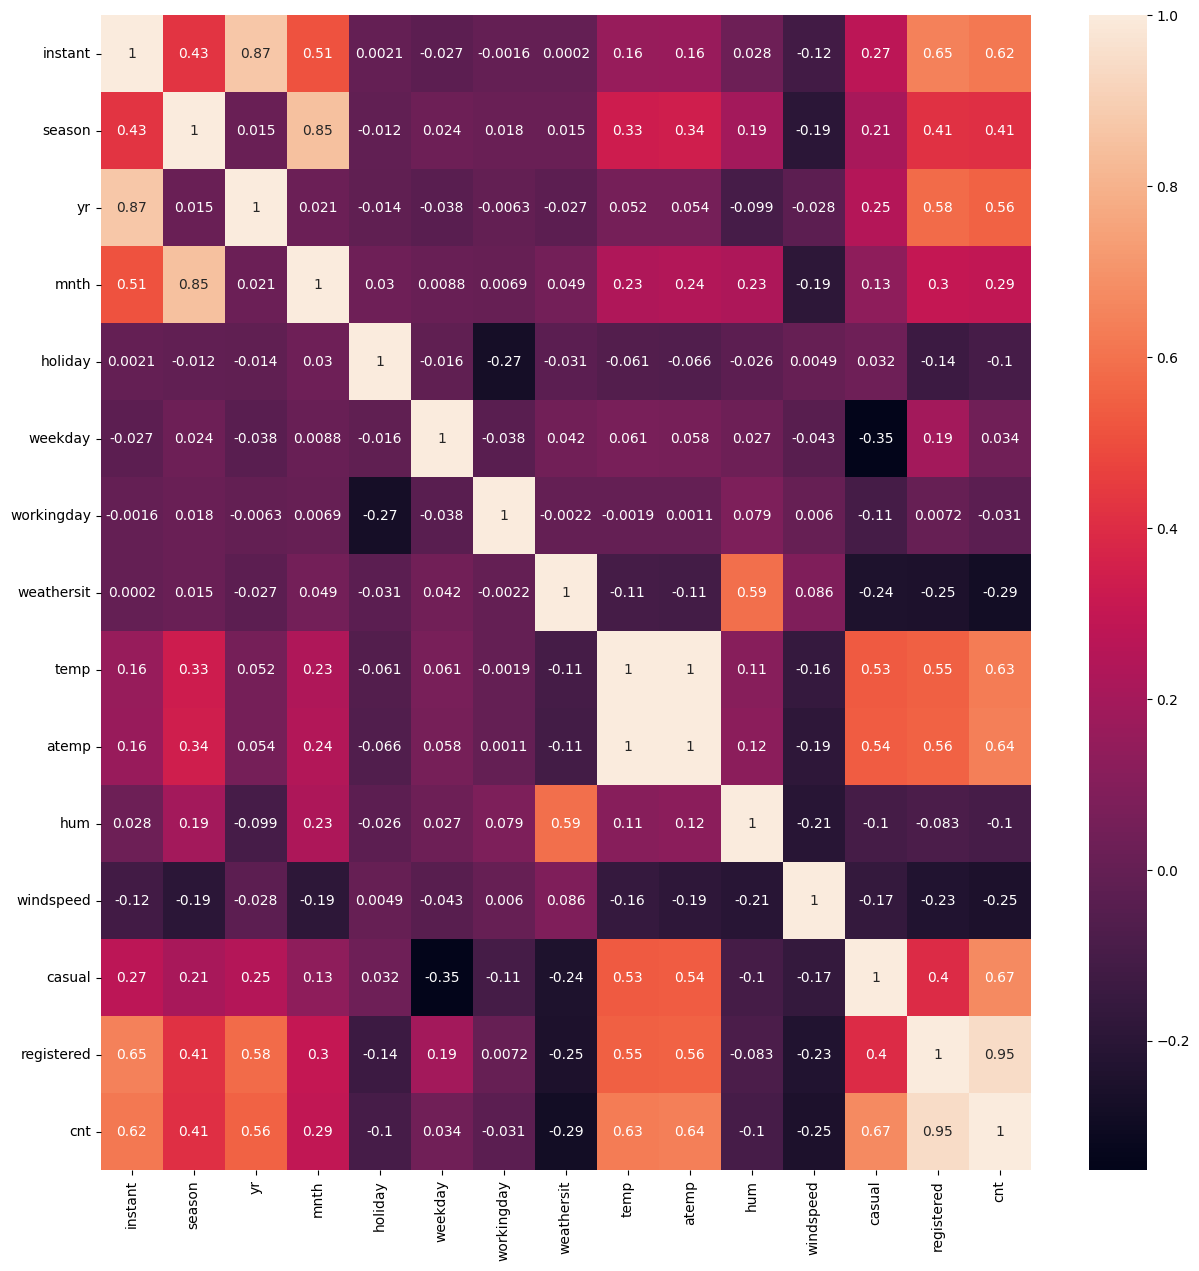

In [ ]:
num_cols = h_train.select_dtypes(include=np.number).columns
corr = h_train[num_cols].corr()


plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Visualizing the distribution of key numerical features using histograms with KDE
## This helps in understanding the underlying data patterns, skewness, and spread of each variable.

<Axes: xlabel='registered', ylabel='Count'>

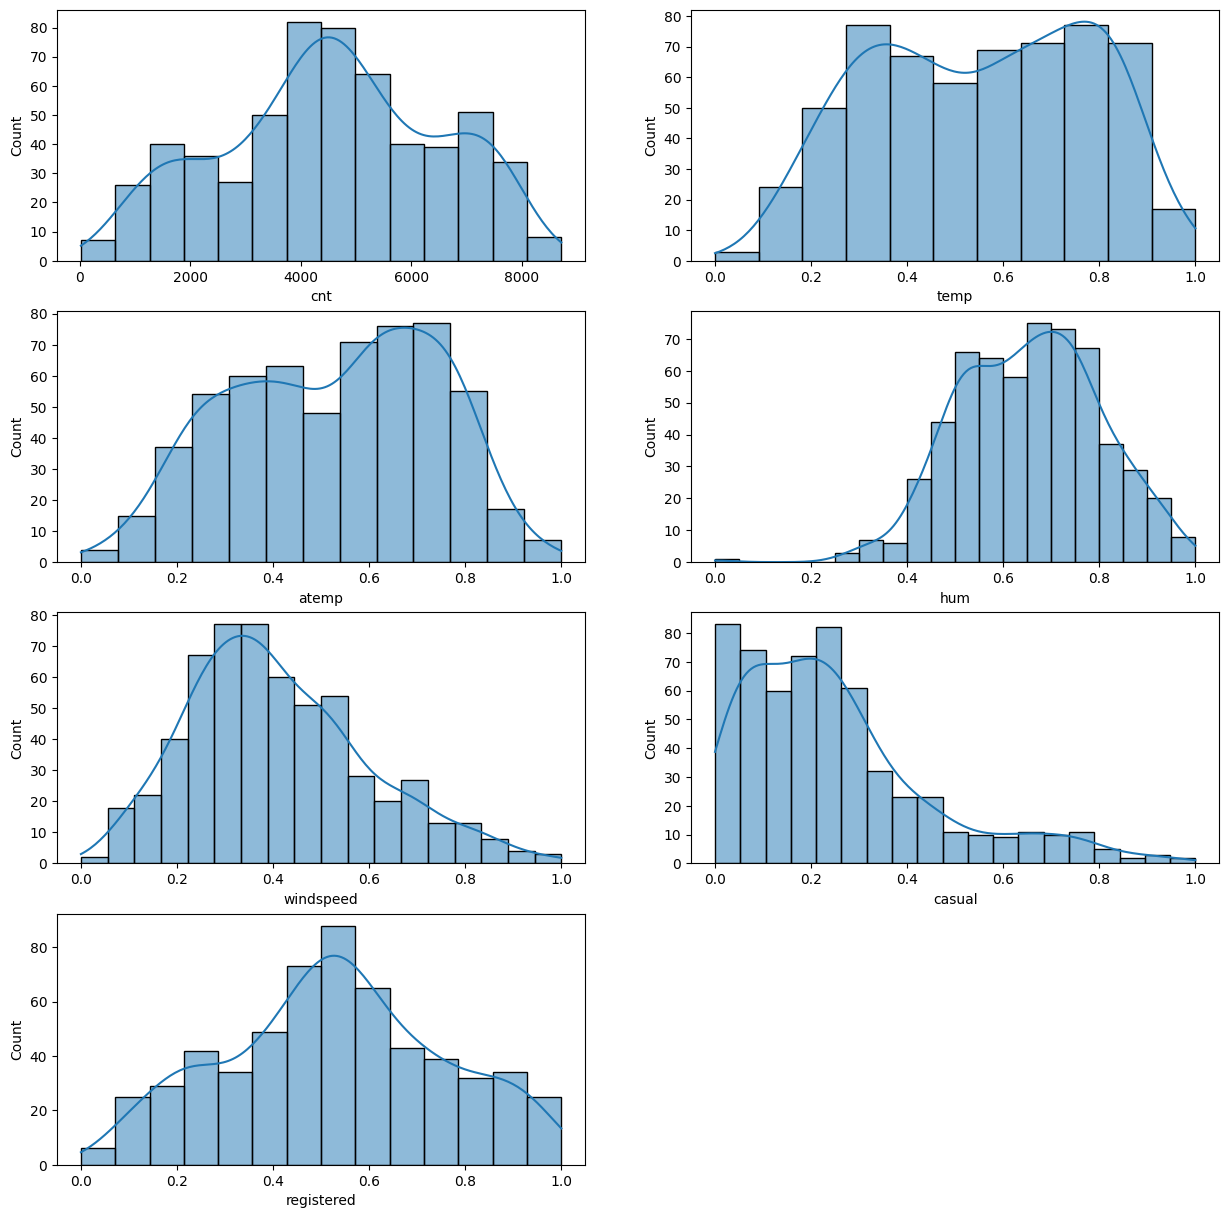

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.histplot(h_train['cnt'],kde=True)

plt.subplot(4,2,2)
sns.histplot(h_train['temp'],kde=True)

plt.subplot(4,2,3)
sns.histplot(h_train['atemp'],kde=True)

plt.subplot(4,2,4)
sns.histplot(h_train['hum'],kde=True)

plt.subplot(4,2,5)
sns.histplot(h_train['windspeed'],kde=True)

plt.subplot(4,2,6)
sns.histplot(h_train['casual'],kde=True)

plt.subplot(4,2,7)
sns.histplot(h_train['registered'],kde=True)

# model training

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train = h_train.drop('cnt',axis=1)
y_train = h_train['cnt']

# Model train with single feature

In [ ]:
x_train_lm = sm.add_constant(x_train['registered'])
lr = sm.OLS(y_train,x_train_lm).fit()

In [ ]:
lr.params

,0
const,249.891775
registered,8113.500828


In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     5048.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          5.35e-289
Time:                        14:47:19   Log-Likelihood:                -4591.1
No. Observations:                 584   AIC:                             9186.
Df Residuals:                     582   BIC:                             9195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.8918     65.835      3.796      0.0

# Model train with two feature

In [ ]:
x_train_lm = sm.add_constant(x_train[['registered','casual']])
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.726e+31
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:47:19   Log-Likelihood:                 14317.
No. Observations:                 584   AIC:                        -2.863e+04
Df Residuals:                     581   BIC:                        -2.862e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   5.78e-13   3.81e+13      0.0

# Model train with three feature

In [ ]:
x_train_lm = sm.add_constant(x_train[['registered','casual','windspeed']])
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.894e+31
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:47:19   Log-Likelihood:                 14721.
No. Observations:                 584   AIC:                        -2.943e+04
Df Residuals:                     580   BIC:                        -2.942e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   4.34e-13   5.07e+13      0.0

In [ ]:
h_train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Model train with all feature

In [ ]:
x_train_lm = sm.add_constant(x_train.drop(columns=['dteday', 'instant']))
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.929e+29
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:47:19   Log-Likelihood:                 13454.
No. Observations:                 584   AIC:                        -2.688e+04
Df Residuals:                     570   BIC:                        -2.682e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   7.23e-12   3.04e+12      0.0

## OLS model showed 100% variance explained (R-squared = 1), which is impossible.
## This is because the features 'registered' and 'casual' are directly contributing to 'cnt' (target),
## causing perfect multicollinearity. To build a valid model, we remove these columns along with
## non-predictive columns 'instant' and 'dteday'.
## We then fit an OLS (Ordinary Least Squares) regression model on the remaining features
## and examine the model coefficients and summary statistics.


In [ ]:
values = ['dteday', 'instant','registered','casual']
x_train_lm = sm.add_constant(x_train.drop(columns=values))
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          1.04e-183
Time:                        14:47:19   Log-Likelihood:                -4802.7
No. Observations:                 584   AIC:                             9629.
Df Residuals:                     572   BIC:                             9682.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2059.8970    257.179      8.010      0.0

# Drop columns with large p-values from train data to increase model significance
Columns dropped:
- 'weekday' and 'temp' (insignificant with large p-values)

We refit the OLS regression model on the remaining variables after deleting the above features to yield a model with more dependable and significant predictors.

In [ ]:
values = ['dteday', 'instant','registered','casual','weekday','temp']
x_train_lm = sm.add_constant(x_train.drop(columns=values))
lr2 = sm.OLS(y_train,x_train_lm).fit()

lr2.params

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     234.5
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          8.40e-186
Time:                        14:47:19   Log-Likelihood:                -4803.4
No. Observations:                 584   AIC:                             9627.
Df Residuals:                     574   BIC:                             9671.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2136.1784    248.057      8.612      0.0

## Assessing multicollinearity of independent variables with Variance Inflation Factor (VIF)
## VIF measures the inflation in the variances of the parameter estimates of the regression that is caused due to the correlation among the features.
## A large VIF (> 5 or 10) indicates strong multicollinearity which could have undesired impact on the stability of the model and the interpretation of the coefficients.
## This lets us spot (and remove) highly correlated predictors prior to running the final model.

In [ ]:
# now we check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values,i) for i in range(x_train_lm.shape[1])]

In [ ]:
vif

,Features,VIF
0,const,43.284824
1,season,3.881700
2,yr,1.022419
3,mnth,3.707200
4,holiday,1.095543
5,workingday,1.096848
6,weathersit,1.734476
7,atemp,1.222330
8,hum,1.875346
9,windspeed,1.155526


In [ ]:
# model evalution

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [ ]:
final_cols = ['season','yr','mnth','holiday','workingday','weathersit','atemp','hum','windspeed']


In [ ]:
scaling_nums = ['temp','atemp',	'hum',	'windspeed',	'casual',	'registered'	]
h_test_scaled = h_test.copy()
h_test_scaled[scaling_nums] = scaler.transform(h_test[scaling_nums])

# same columns lo
X_test_final = sm.add_constant(h_test_scaled[final_cols])

# prediction
y_pred = lr2.predict(X_test_final)

## Model Evaluation

In [ ]:
r2 = r2_score(h_test['cnt'], y_pred)
mse = mean_squared_error(h_test['cnt'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(h_test['cnt'], y_pred)

print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.8380663294047186
MSE: 554273.3637618615
RMSE: 744.4953752454487
MAE: 569.2502119465283
